In [1]:
from nltk.corpus import sentiwordnet as swn

In [73]:
list(swn.senti_synsets('bullish'))

[SentiSynset('bullish.s.01')]

In [35]:
word = swn.senti_synset('funny.a.01')
print(word.pos_score())
print(word.neg_score())
print(word.obj_score())

0.5
0.0
0.5


In [1]:
from os.path import join, isfile
from os import listdir

def read_in_files(file_list):
    arts = {}
    for file in file_list:
        with open('articles/'+file, 'r', encoding='utf-8') as f:
            arts[file[8:]]= f.readlines()
    return arts



topics = ['bitcoin']

for topic in topics:
    topic_files = [f for f in listdir('articles') if topic in f]
    
    topic_corpus = read_in_files(topic_files)
    


In [47]:
import nltk
from modules import g_news_corpus as gncb
from nltk.corpus import stopwords
from gensim.models import Word2Vec

def word_tokenize_doc(doc):
    stopWords = set(stopwords.words('english'))
    stopWords.update({',', '.', '’', '“', '”', ')', '(', '—', '``', '?', ':', ';', "''", '/', '–', '‘',
                     '$', '%', '[', ']', "'s", '!', "'", '-', '}', '{', '//'})

    tokens = [i for i in nltk.word_tokenize(doc.lower()) if i not in stopWords]

    return tokens


def create_word2vec_model_from_articles(articles):
    sentences = []

    for art in articles:
        raw_sentences = nltk.sent_tokenize(art)
        for s in raw_sentences:
            tokens_ = word_tokenize_doc(s)
            sentences.append(tokens_)

    m_count = 2

        
    model = Word2Vec(sentences=sentences, window=5, min_count=m_count, workers=8)

    return model

number_done = 0
to_graph = {}
for time_period in topic_corpus:
    model = create_word2vec_model_from_articles(topic_corpus[time_period])
    to_graph[time_period] = model
    print(len(model.wv.vocab), end='\r')
    number_done += 1
    

In [48]:
def get_adjectives(similar):
    terms = []
    for term in similar:
        terms.append(term[0])
    
    adjectives = []
    for term in terms:
        pos = nltk.pos_tag([term])
        #print(pos[0][1])
        if pos[0][1] in ['JJ', 'JJR', 'JJS']:
            adjectives.append(pos[0][0])
            
    return adjectives


#similar = to_graph['2010-12-17 2011-02-15.txt'].wv.most_similar('bitcoin', topn=550)
#get_adjectives(similar)[:10]

In [104]:
from nltk.corpus import sentiwordnet as swn

def get_sentiment(word_list):
    score = 0
    number_accessed = 0
    for w in word_list:
        if len(list(swn.senti_synsets(w))):
            number_accessed += 1
            word = list(swn.senti_synsets(w))[0]
            score = score + word.pos_score() - word.neg_score()
    return score/number_accessed * 10

In [108]:
lang_scores = {}

for time_period in to_graph:
    similar = to_graph[time_period].wv.most_similar('bitcoin', topn=550)
    adjectives = get_adjectives(similar)[:20]
    lang_scores[time_period] = get_sentiment(adjectives)
    print(lang_scores[time_period], end='\n')
    #print(time_period)
    

-0.15625
0.0
-0.5625
0.39473684210526316
1.171875
0.06578947368421052
-0.39473684210526316
1.1842105263157894
0.75
0.4861111111111111
0.9027777777777778
0.5263157894736842
0.5921052631578947
1.0625
0.25
0.19736842105263158
1.0
1.375
0.8125
0.625
1.0625
1.125
1.375
0.3125
0.875
1.25
1.0625
1.3125
0.5
0.375
0.75
0.4375
-0.3125
1.0
0.4375
1.125
0.6875
0.75
0.5263157894736842
1.125
0.5625
0.375
0.25
0.5625
-0.0625
0.8125
0.75
1.0625
0.75
1.1875
0.25
1.4375
1.3125
0.5625
0.4375
0.6875
1.5
0.625
0.9375
0.5625
0.6875
1.0625
0.75
0.5
0.9375
0.625
1.0
1.125
1.125
0.75
0.6875
0.8125
0.75
1.25
0.8125
0.125
0.0
0.5
0.375
0.5
0.625
0.375
1.3125
0.5
1.0625
0.875
1.125
1.4375
1.125
0.6875
0.875
0.75
0.25
1.125
0.8125
1.1875
1.125
1.125
1.0625
1.0
1.3125
1.3125
1.8125
0.875
1.0625
0.875
0.5625
1.125
0.9375
1.4375
1.3125
1.4375
2.0625
1.3125
1.0
1.0
1.875
0.9375
0.8125
0.75
1.0625
1.125
1.25
1.5625
1.5625
1.5
1.125
1.6875
0.8125
0.6875
1.1875
1.0
1.375
1.5
1.1875
0.5
1.0
0.3125
1.125
1.1875
1.1875
1.31

In [68]:
to_graph[time_period].wv

TypeError: rank() missing 2 required positional arguments: 'entity1' and 'entity2'

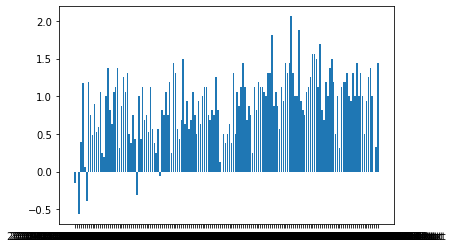

In [109]:
import matplotlib.pyplot as plt

lang_scores

plt.bar(lang_scores.keys(),lang_scores.values())
plt.show()

In [57]:
#to_graph['2010-12-17 2011-02-15.txt'].wv.vocab

In [113]:
to_graph['2010-12-17 2011-02-15.txt'].wv.evaluate_word_analogies()

TypeError: evaluate_word_analogies() missing 1 required positional argument: 'analogies'

In [34]:
from nltk.corpus import sentiwordnet as swn



def get_sentiment(word_list):
    score = 0
    for w in word_list:
        word = swn.senti_synset(w+'.a.01')
        neg = -(word.neg_score())
        pos = word.pos_score()
        print(neg, pos)
    return score

get_sentiment(['married', 'old', 'funny', 'second', 'unveiled'])


-0.0 0.0
-0.0 0.375
-0.0 0.5
-0.0 0.0
-0.0 0.0


0

["A few weeks ago, we mentioned a rather unusual technological endeavor to create an online currency. We received a few queries about this subject, so decided to provide a more thorough description of what digital currency is, how this system works, why it's appealing and how it might fall short of user expectations.\n", '\n', 'To understand digital currency, one must first note that money in the digital age has moved from a largely anonymous system to one increasingly laden with tracking, control and regulatory overhead. Our cold hard cash is now shepherded through a series of regulated financial institutions like banks, credit unions and lenders. Bitcoin, created in 2009 by Satoshi Nakamoto, is a peer-to-peer digital currency system that endeavors to re-establish both privacy and autonomy by avoiding the banking and government middlemen. The goal is to allow individuals and merchants to generate and exchange modern money directly. Once the Bitcoin software has been downloaded, a user

NameError: name 'create_word2vec_model_from_articles' is not defined

In [37]:
l = list(swn.senti_synsets('slow'))

In [42]:
l[1].obj_score()

1.0

In [46]:
l = list(swn.senti_synsets('international'))

In [50]:
l[1].pos_score()

0.0

In [119]:
from gensim.test.utils import datapath

model = to_graph['2022-08-13 2022-09-02.txt']
analogy_scores = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

In [124]:
articles = gncb.create_articles_from_keyphrase(' ', '2022-08-01', '2022-08-22', 'en')

Querying en articles...
https://news.google.com/rss/search?q= +after:2022-08-01+before:2022-08-22&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-01+before:2022-08-11&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-01+before:2022-08-06&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-01+before:2022-08-03&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-01+before:2022-08-02&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-02+before:2022-08-03&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-03+before:2022-08-06&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-03+before:2022-08-04&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-04+before:2022-08-06&ceid=US:en&hl=en-US&gl=US
https://news.google.com/rss/search?q= +after:2022-08-04+before:2022-08-05&ce

c:\python\python39\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


c:\python\python39\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Complete              Fail Rate: 5.31 %  


In [126]:
model = gncb.create_word2vec_model_from_articles(articles)

In [128]:
from gensim.test.utils import datapath

analogy_scores = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

In [129]:
analogy_scores

(0.0020761798291144295,
 [{'section': 'capital-common-countries',
   'correct': [('BEIJING', 'CHINA', 'OTTAWA', 'CANADA'),
    ('CAIRO', 'EGYPT', 'OTTAWA', 'CANADA'),
    ('HAVANA', 'CUBA', 'BERLIN', 'GERMANY'),
    ('PARIS', 'FRANCE', 'BEIJING', 'CHINA')],
   'incorrect': [('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ'),
    ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
    ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
    ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
    ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
    ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
    ('ATHENS', 'GREECE', 'HANOI', 'VIETNAM'),
    ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
    ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
    ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
    ('ATHENS', 'GREECE', 'KABUL', 'AFGHANISTAN'),
    ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
    ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
    ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
    ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
    ('ATHENS', 'GREECE', 